In [1]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm

import math
import pandas as pd
import numpy as np

## Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import eda_functions as eda


In [2]:
df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ksprojects.csv")

In [3]:
df.head()

,id,name,category,main_category,deadline,goal,launched,state,backers,country,usd_pledged,currency,pledged
0,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20 21:50:00,300.0,2009-04-30 22:10:30,failed,4,US,40.00,USD,40.00
1,1100844465,daily digest,Documentary,Film & Video,2009-06-01 02:20:00,700.0,2009-05-04 21:14:28,successful,14,US,700.00,USD,700.00
2,1316334968,Drive A Faster Car 2.0,Nonfiction,Publishing,2009-06-04 06:00:00,1000.0,2009-05-04 22:51:31,successful,32,US,1367.00,USD,1367.00
3,1304906577,Accidental to Edinburgh - PHASE 1: AIRFARE,Theater,Theater,2009-06-05 05:59:00,6000.0,2009-04-30 22:22:43,successful,24,US,6575.00,USD,6575.00
4,1099226462,Logical Guess Pictures' 2nd Horror Movie!,Film & Video,Film & Video,2009-06-06 00:45:00,500.0,2009-04-30 01:32:55,successful,22,US,501.66,USD,501.66


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65418 entries, 0 to 65417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             65418 non-null  int64  
 1   name           65418 non-null  object 
 2   category       65418 non-null  object 
 3   main_category  65418 non-null  object 
 4   deadline       65418 non-null  object 
 5   goal           65418 non-null  float64
 6   launched       65418 non-null  object 
 7   state          65418 non-null  object 
 8   backers        65418 non-null  int64  
 9   country        65418 non-null  object 
 10  usd_pledged    64673 non-null  float64
 11  currency       65418 non-null  object 
 12  pledged        65418 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 6.5+ MB


In [6]:
eda.miss_df(df)

,Total,Percent
usd_pledged,745,1.13883
id,0,0.00000
name,0,0.00000
category,0,0.00000
main_category,0,0.00000
deadline,0,0.00000
goal,0,0.00000
launched,0,0.00000
state,0,0.00000
backers,0,0.00000


In [8]:
df.dropna(inplace=True)
eda.miss_df(df)

,Total,Percent
id,0,0.0
name,0,0.0
category,0,0.0
main_category,0,0.0
deadline,0,0.0
goal,0,0.0
launched,0,0.0
state,0,0.0
backers,0,0.0
country,0,0.0


In [12]:
objs = eda.siftdatatype(df)['objs']
nums = eda.siftdatatype(df)['nums']

In [20]:
[ len(df[i].unique()) for i in objs]

[64575, 158, 15, 62558, 64653, 5, 21, 13]

In [37]:
new_objs = [ 'category',
             'main_category',
             'state',
             'country',
             'currency']

In [38]:
[(df[i].unique()) for i in new_objs[1:]]

[array(['Film & Video', 'Publishing', 'Theater', 'Art', 'Crafts',
        'Photography', 'Design', 'Music', 'Games', 'Fashion', 'Technology',
        'Journalism', 'Food', 'Comics', 'Dance'], dtype=object),
 array(['failed', 'successful', 'canceled', 'suspended', 'live'],
       dtype=object),
 array(['US', 'GB', 'CA', 'AU', 'NZ', 'NL', 'IE', 'SE', 'NO', 'DK', 'DE',
        'FR', 'AT', 'ES', 'IT', 'CH', 'BE', 'LU', 'SG', 'HK', 'MX'],
       dtype=object),
 array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK',
        'CHF', 'SGD', 'HKD', 'MXN'], dtype=object)]

In [36]:
[ print(df[i].value_counts()) for i in new_objs[1:]]

Film & Video    11511
Music            8911
Publishing       6802
Games            5737
Technology       5325
Art              4843
Design           4798
Food             4343
Fashion          3699
Theater          2014
Photography      1933
Comics           1791
Crafts           1474
Journalism        811
Dance             681
Name: main_category, dtype: int64
failed        33901
successful    23101
canceled       6422
live            938
suspended       311
Name: state, dtype: int64
US    52071
GB     5617
CA     2404
AU     1258
DE      538
NL      457
FR      397
IT      374
ES      294
SE      266
NZ      236
DK      157
NO      120
IE       99
AT       98
BE       90
CH       88
MX       43
SG       29
HK       26
LU       11
Name: country, dtype: int64
USD    52071
GBP     5617
CAD     2404
EUR     2358
AUD     1258
SEK      266
NZD      236
DKK      157
NOK      120
CHF       88
MXN       43
SGD       29
HKD       26
Name: currency, dtype: int64


[None, None, None, None]

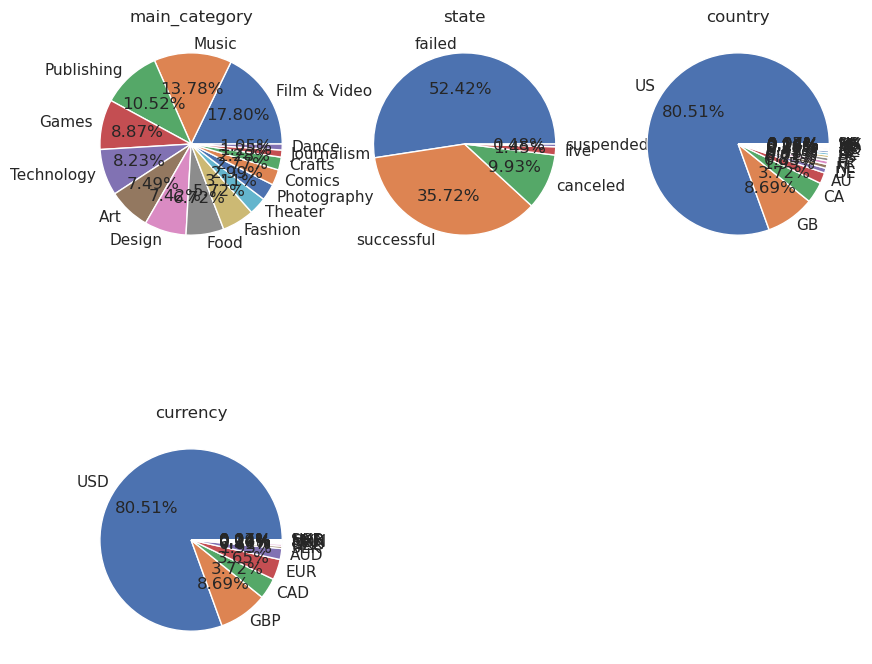

In [59]:
plt.figure(figsize=(10,30))
for i, feat in enumerate(new_objs[1:]):
    labels = df[feat].value_counts().index
    size = df[feat].value_counts().values
    ax = plt.subplot(6, 3, i+1)
    ax.pie(size, labels=labels, autopct="%.2f%%")
    plt.title(feat)
    ax.axis("off")
    
    #plt.tight_layout(pad=5.0)